# ECMWF Tropical Cyclone Data Extractor - KIKO Example

The extractor downloads tropical cyclone track BUFR files from ECMWF's Dissemination (DISS) system at https://essential.ecmwf.int/. It provides dynamic access to forecast data based on date/time parameters.

## Download

In [22]:
from ecmwf_tc_data_downloader import download_tc_data, list_available_storms

### List available storms

In [23]:
storms = list_available_storms(limit=1)

print(f"Found {len(storms)} unique storms:")
for i, storm in enumerate(storms, 1):
    print(f"{i:2d}. {storm['storm_name']:8s} at {storm['latitude']:12s}, {storm['longitude']:12s} (Forecast: {storm['forecast_time']})")

Found 1 forecast dates
   Found 4 tropical cyclone track files
Found 0 unique storms
Found 0 unique storms:


### Download latest forecasts

In [24]:
results = download_tc_data(limit=1, start_date='20250910', end_date='20250910', storm_name='KIKO', output_dir='tc_kiko')

Found 122 forecast dates
Processing 4 forecast(s)
Filtering for storm: KIKO

   Found 2 tropical cyclone track files
   Storm: KIKO at 22p9degN, -158p1degW
   Downloaded: A_JSXX02ECEP101800_C_ECMP_20250910180000_tropical_cyclone_track_KIKO_-158p1degW_22p9degN_bufr4.bin (11,508 bytes)
   Downloaded: A_JSXX02ECMF101800_C_ECMP_20250910180000_tropical_cyclone_track_KIKO_-158p1degW_22p9degN_bufr4.bin (214 bytes)

   Found 2 tropical cyclone track files
   Storm: KIKO at 22p7degN, -157p5degW
   Downloaded: A_JSXX02ECEP101200_C_ECMP_20250910120000_tropical_cyclone_track_KIKO_-157p5degW_22p7degN_bufr4.bin (8,877 bytes)
   Downloaded: A_JSXX02ECMF101200_C_ECMP_20250910120000_tropical_cyclone_track_KIKO_-157p5degW_22p7degN_bufr4.bin (214 bytes)

   Found 2 tropical cyclone track files
   Storm: KIKO at 22p4degN, -156p5degW
   Downloaded: A_JSXX02ECEP100600_C_ECMP_20250910060000_tropical_cyclone_track_KIKO_-156p5degW_22p4degN_bufr4.bin (8,004 bytes)
   Downloaded: A_JSXX02ECMF100600_C_ECMP_202509

## Extract

In [25]:
from ecmwf_tc_data_extractor import extract_tc_data, extract_tc_data_from_file

In [26]:
# Extract data from the downloaded KIKO storm file
filename = 'tc_kiko/A_JSXX02ECEP100000_C_ECMP_20250910000000_tropical_cyclone_track_KIKO_-155p7degW_22p7degN_bufr4.bin'

# Extract using the main function (saves to CSV automatically)
result = extract_tc_data_from_file(filename, output_dir='tc_kiko')

Extracting tropical cyclone data from: tc_kiko/A_JSXX02ECEP100000_C_ECMP_20250910000000_tropical_cyclone_track_KIKO_-155p7degW_22p7degN_bufr4.bin
Stage 1: Reading BUFR file structure...
Storm: 11E, Ensemble Members: 52
Forecast Base Time: 2025-09-10 00:00:00
Number of Subsets: 52
Stage 2: Extracting data arrays from BUFR Section 4...
Array sizes:
  latitude: 4163
  longitude: 4163
  significance: 134
    Unique values: [1 3 4 5]
  time_period: 40
  pressure: 2081
  wind_speed: 2081
  wind_threshold: 123
    Unique values: [18 26 33]
  bearing: 984
    Unique values: [  0.  90. 180. 270.]

Stage 3: Mapping wind radii data to positions...
Processing 4163 positions...
Mapping wind radii data using systematic array association...

Stage 4: Structuring data and creating comprehensive records...
Total records created: 4163
Records with coordinates: 307
Records with wind radii data: 123

Wind threshold distribution:
  35 knots: 41 records
  51 knots: 41 records
  64 knots: 41 records

Bearing

### Extract data without saving to CSV

In [27]:
df = extract_tc_data(filename, verbose=False)

print(f"Extracted {len(df)} records")
print(f"Columns: {list(df.columns)}")
print(f"Sample data:")
print(df.head())

Extracted 4163 records
Columns: ['storm_id', 'ensemble_member', 'forecast_step_hours', 'datetime', 'significance_code', 'position_type', 'latitude', 'longitude', 'pressure_pa', 'pressure_hpa', 'wind_speed_ms', 'wind_speed_knots', 'wind_threshold_ms', 'wind_threshold_knots', 'bearing_degrees', 'max_radius_km', 'array_index', 'has_wind_radii']
Sample data:
  storm_id  ensemble_member  forecast_step_hours            datetime  \
0      11E                1                    6 2025-09-10 06:00:00   
1      11E                2                    6 2025-09-10 06:00:00   
2      11E                3                    6 2025-09-10 06:00:00   
3      11E                4                    6 2025-09-10 06:00:00   
4      11E                5                    6 2025-09-10 06:00:00   

   significance_code      position_type  latitude  longitude  pressure_pa  \
0                  1       storm_center      22.7     -155.7          NaN   
1                  4  analysis_position       NaN       

## Explore

In [28]:
from ecmwf_tc_data_explorer import (
    load_tc_data,
    calculate_wind_radii_from_points,
    create_track_visualization,
    create_wind_field_visualization,
    create_data_availability_visualization,
    create_wind_radii_spatial_plot,
    create_wind_radii_direction_plot
)

In [29]:
# Load the extracted data
csv_file = 'tc_kiko/A_JSXX02ECEP100000_C_ECMP_20250910000000_tropical_cyclone_track_KIKO_-155p7degW_22p7degN_bufr4_extracted.csv'

# Load data
df = load_tc_data(csv_file)

# Calculate wind radii
df, radii_df = calculate_wind_radii_from_points(df)

Total records loaded: 4163
Columns in dataset: 18

Data quality summary:
  storm_id: 4163/4163 values (100.0%)
  ensemble_member: 4163/4163 values (100.0%)
  forecast_step_hours: 4163/4163 values (100.0%)
  datetime: 4163/4163 values (100.0%)
  position_type: 4163/4163 values (100.0%)
  latitude: 307/4163 values (7.4%)
  longitude: 307/4163 values (7.4%)
  wind_speed_knots: 306/4163 values (7.4%)
  wind_threshold_knots: 123/4163 values (3.0%)
  bearing_degrees: 123/4163 values (3.0%)
  has_wind_radii: 4163/4163 values (100.0%)

Wind radii analysis:
  Records with wind radii flags: 123
  Records with coordinates: 123
  Records with wind thresholds: 123
  Records with bearings: 123
Calculated radii for 123 wind points
Radius range: 0.0 to 397.5 km


### Data Availability

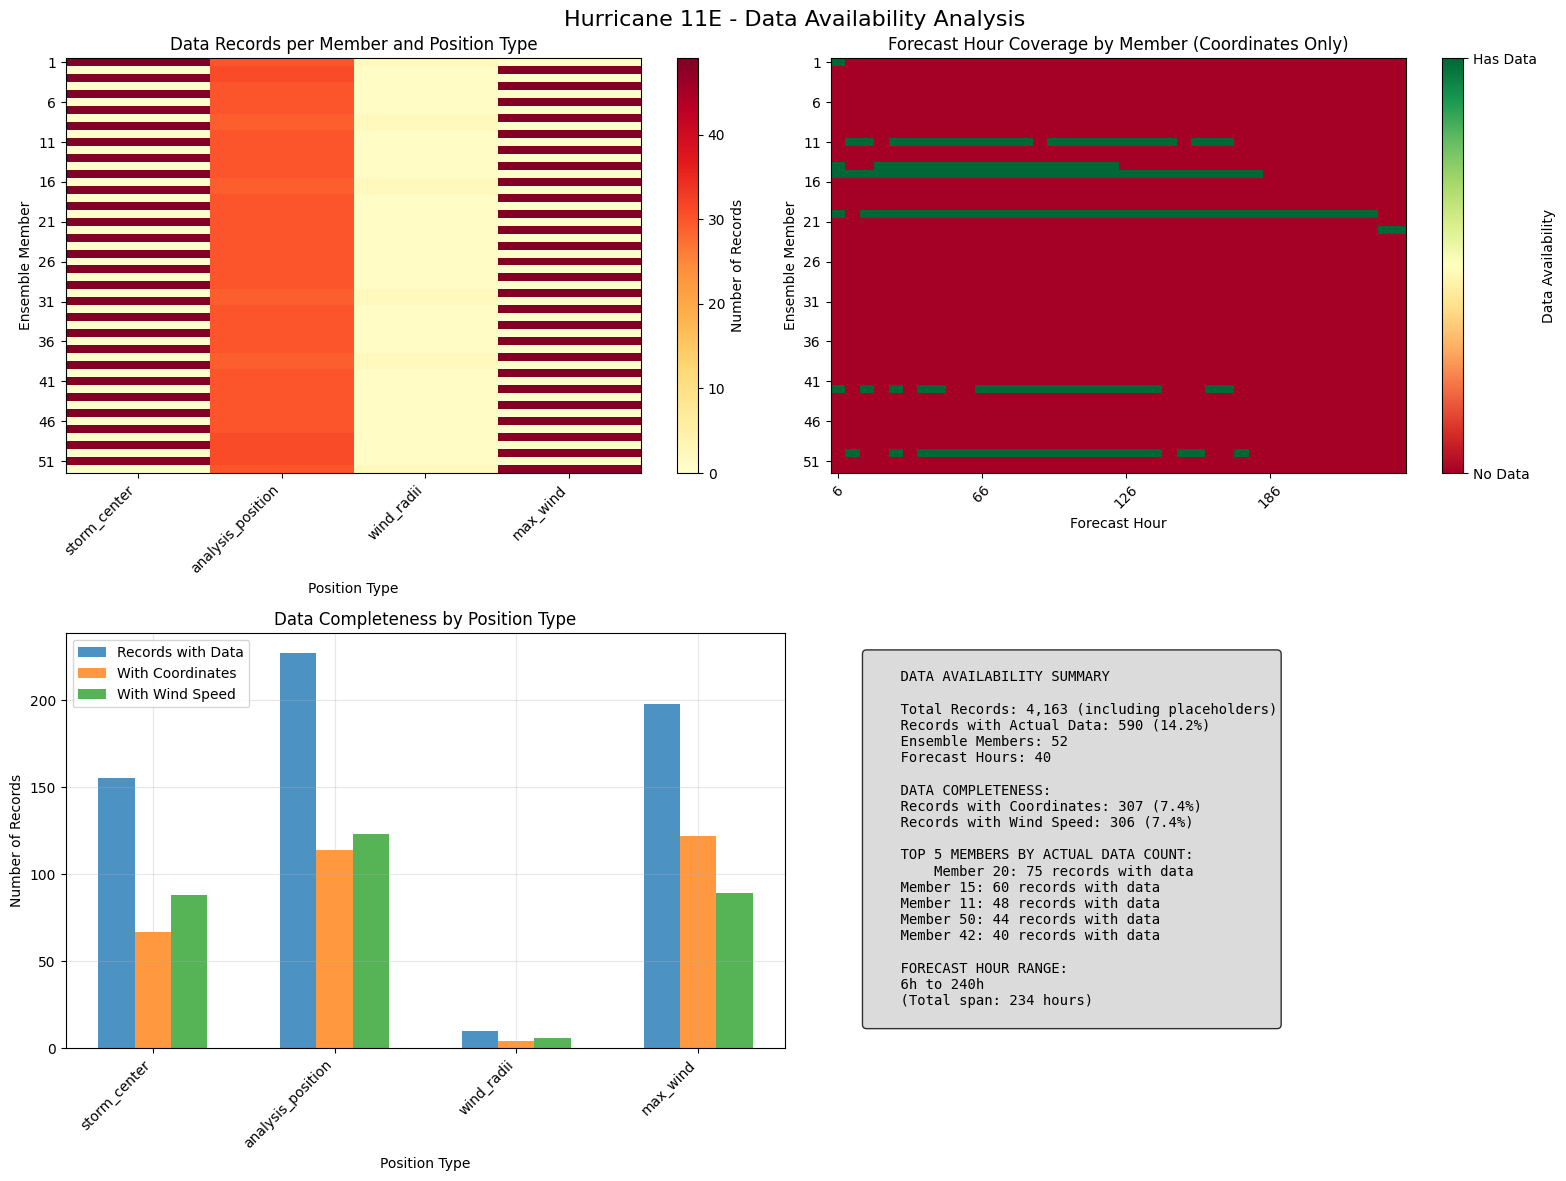

In [30]:
fig_availability = create_data_availability_visualization(df)

### Track visualization

Displaying all 3 ensemble members


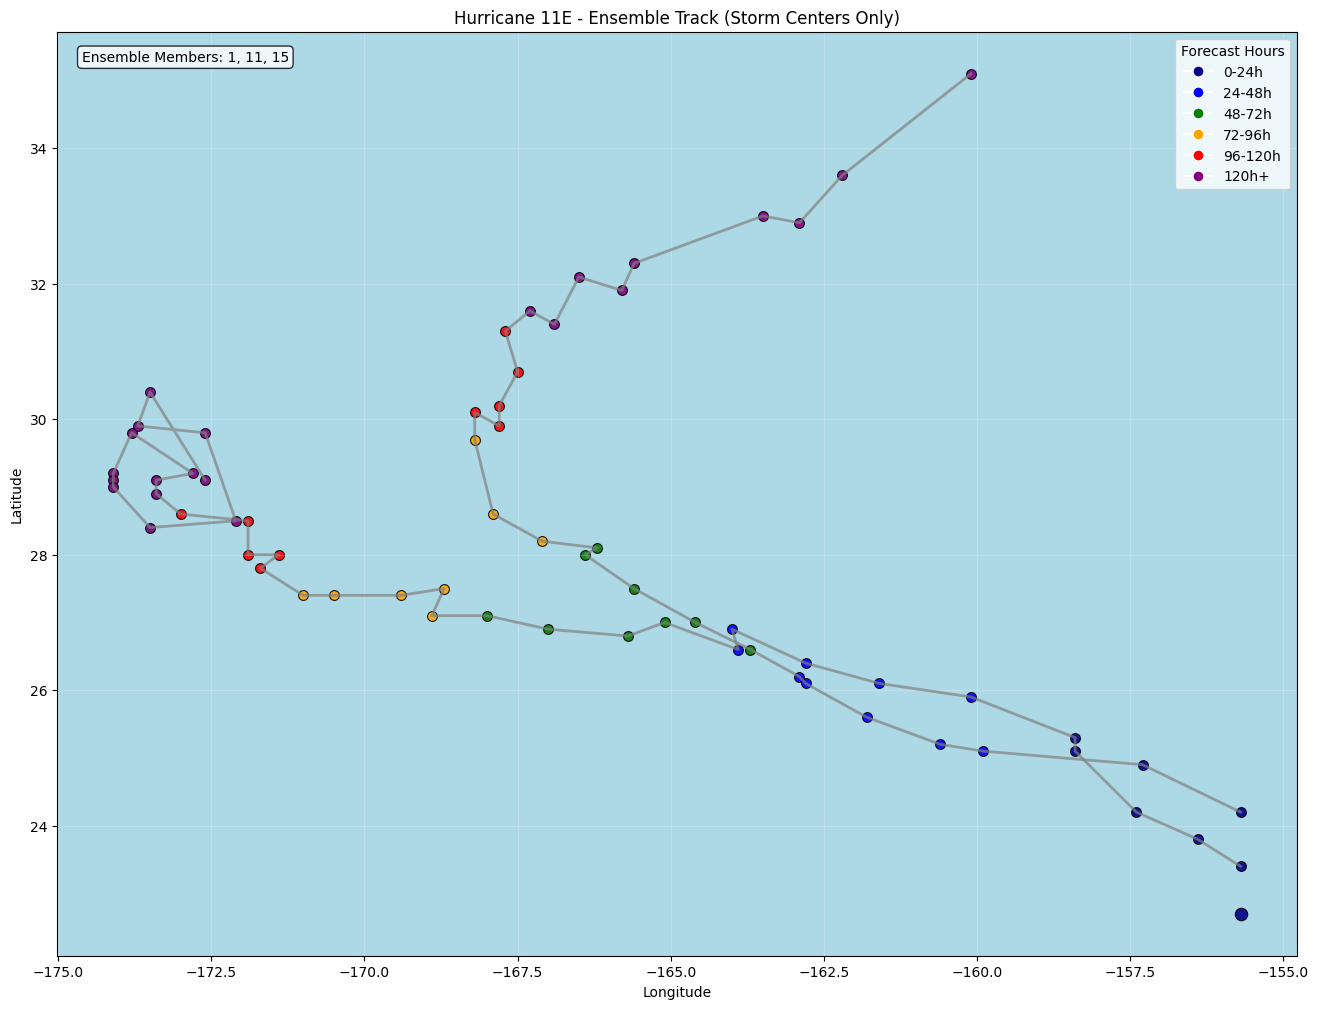

In [31]:
fig_tracks = create_track_visualization(df)

### Wind Fields Visualization

Displaying all 3 ensemble members
  Drawing 123 directional wind swaths...


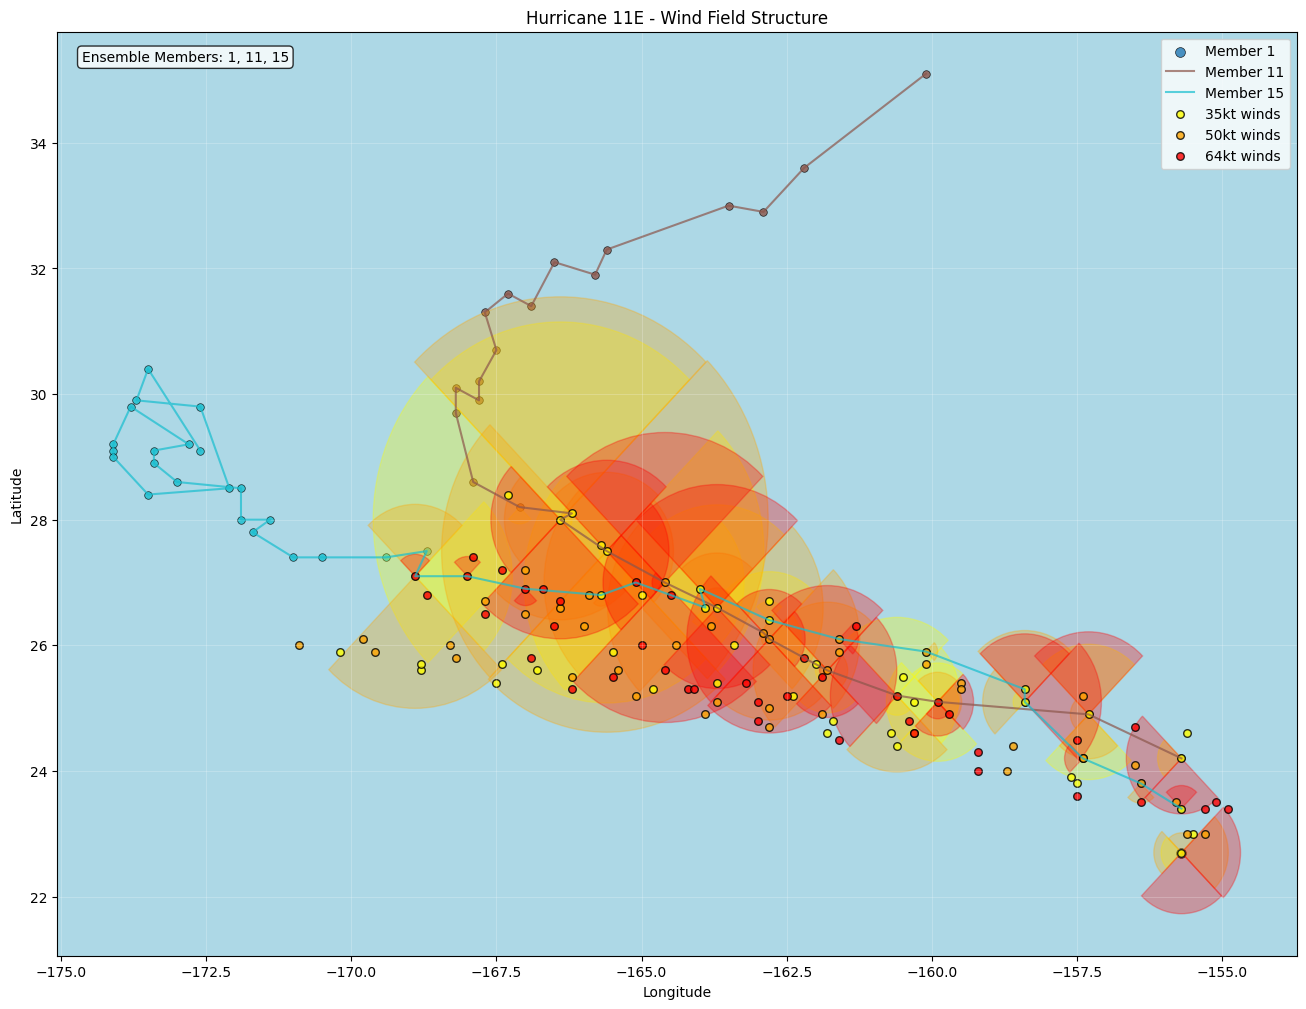

In [32]:
fig_wind_fields = create_wind_field_visualization(df, radii_df)

### Wind Radii Spatial Plot

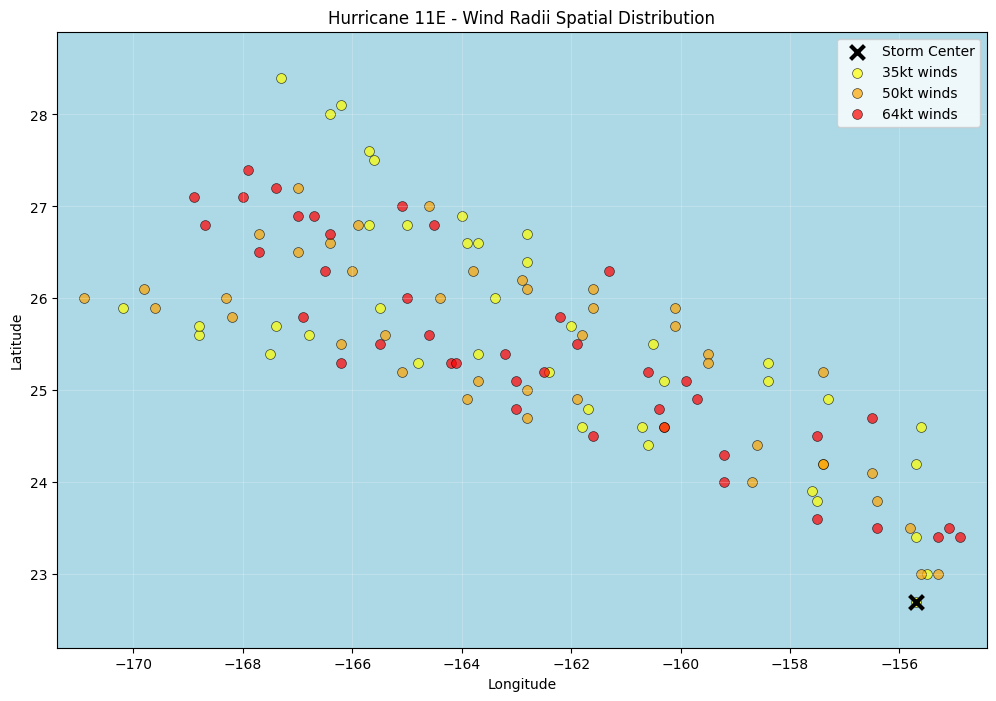

In [33]:
fig_radii_spatial = create_wind_radii_spatial_plot(df, radii_df)

### Wind Radii Direction Plot

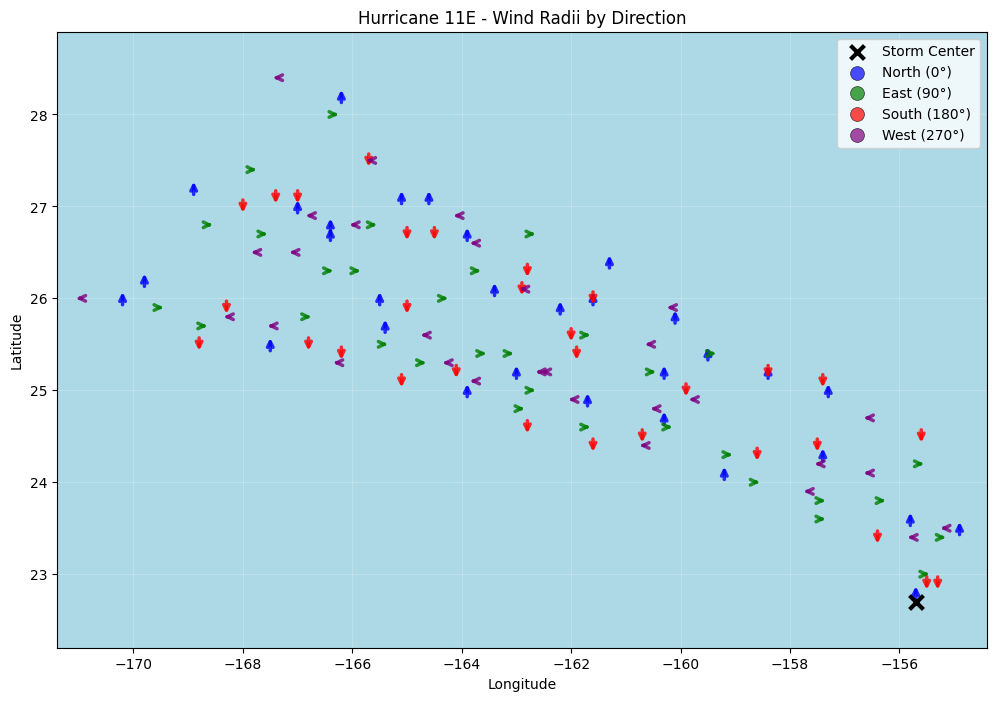

In [34]:
fig_radii_direction = create_wind_radii_direction_plot(df, radii_df)